In [1]:
import numpy as np
import pandas as pd

from analysis_utils import libraries_in_repos, libraries_in_files, plot_popularity, get_corr_table, plot_correlations, plot_correlation_matrix, transform_df

## Data Load and Setup

In [2]:
ipynb_imports_jupyter_repos = pd.read_parquet('../data/ipynb_imports_jupyter_repos.parquet')
ipynb_imports_python_repos = pd.read_parquet('../data/ipynb_imports_python_repos.parquet')
py_imports_jupyter_repos = pd.read_parquet('../data/py_imports_jupyter_repos.parquet')
py_imports_python_repos = pd.read_parquet('../data/py_imports_python_repos.parquet')

In [3]:
py_imports_python_repos_transformed = transform_df(py_imports_python_repos, imports_only=True)
py_imports_jupyter_repos_transformed = transform_df(py_imports_jupyter_repos, imports_only=True)
ipynb_imports_python_repos_transformed = transform_df(ipynb_imports_python_repos, imports_only=True)
ipynb_imports_jupyter_repos_transformed = transform_df(ipynb_imports_jupyter_repos, imports_only=True)

In [4]:
py_files_imports = pd.concat([py_imports_python_repos_transformed, py_imports_jupyter_repos_transformed])
ipynb_files_imports = pd.concat([ipynb_imports_python_repos_transformed, ipynb_imports_jupyter_repos_transformed])
all_files_imports = pd.concat([py_files_imports, ipynb_files_imports])

In [5]:
py_repo_count = py_files_imports['repo'].nunique()
py_file_count = py_files_imports['filename'].nunique()
ipynb_repo_count = ipynb_files_imports['repo'].nunique()
ipynb_file_count = ipynb_files_imports['filename'].nunique()
all_repo_count = all_files_imports['repo'].nunique()
all_file_count = all_files_imports['filename'].nunique()

In [82]:
repo_lib_corr_table_all = get_corr_table(all_files_imports, index='repo', column='library', top_n=320)
file_lib_corr_table_all = get_corr_table(all_files_imports, index='filename', column='library', top_n=320)
repo_lib_corr_table_ipynb = get_corr_table(ipynb_files_imports, index='repo', column='library', top_n=320)
file_lib_corr_table_ipynb = get_corr_table(ipynb_files_imports, index='filename', column='library', top_n=320)
repo_lib_corr_table_py = get_corr_table(py_files_imports, index='repo', column='library', top_n=320)
file_lib_corr_table_py = get_corr_table(py_files_imports, index='filename', column='library', top_n=320)

## Most Popular Libraries

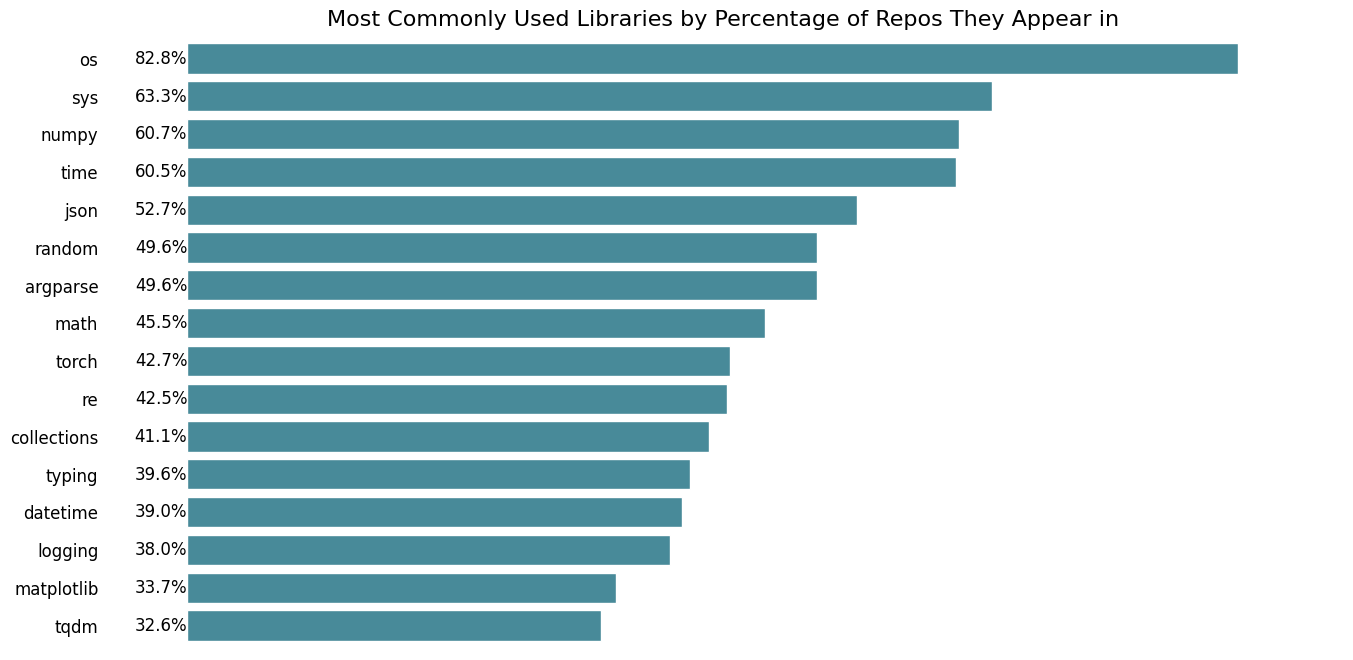

In [6]:
libraries_in_repos_df_all = libraries_in_repos(all_files_imports)
plot_popularity(libraries_in_repos_df_all, 'Most Commonly Used Libraries by Percentage of Repos They Appear in', 16, all_repo_count)

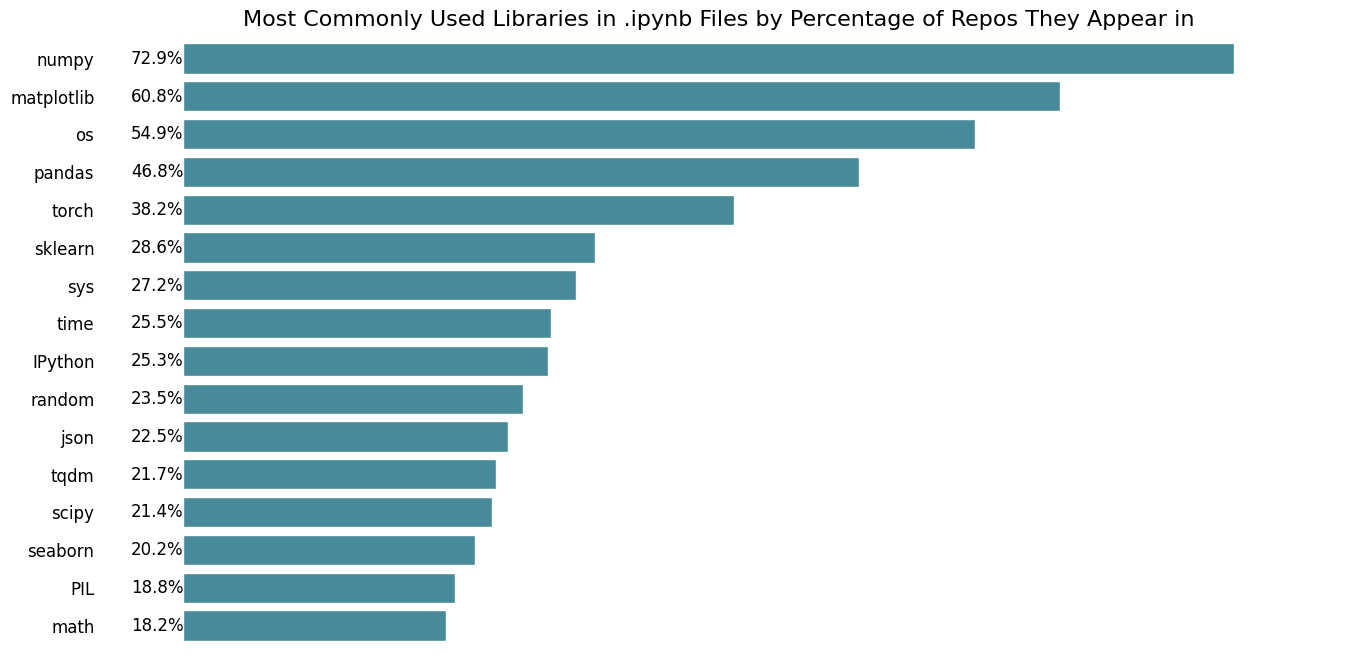

In [7]:
libraries_in_repos_df_ipynb = libraries_in_repos(ipynb_files_imports)
plot_popularity(libraries_in_repos_df_ipynb, 'Most Commonly Used Libraries in .ipynb Files by Percentage of Repos They Appear in', 16, ipynb_repo_count)

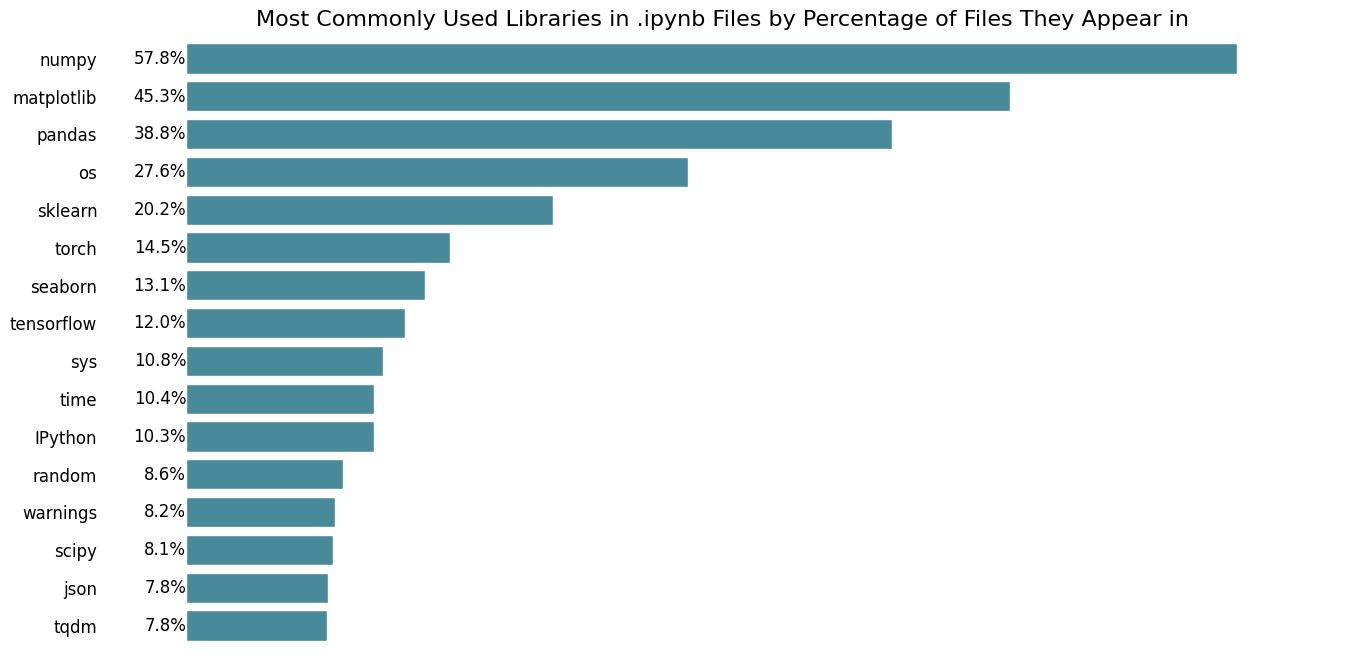

In [8]:
libraries_in_files_df_ipynb = libraries_in_files(ipynb_files_imports)
plot_popularity(libraries_in_files_df_ipynb, 'Most Commonly Used Libraries in .ipynb Files by Percentage of Files They Appear in', 16, ipynb_file_count)

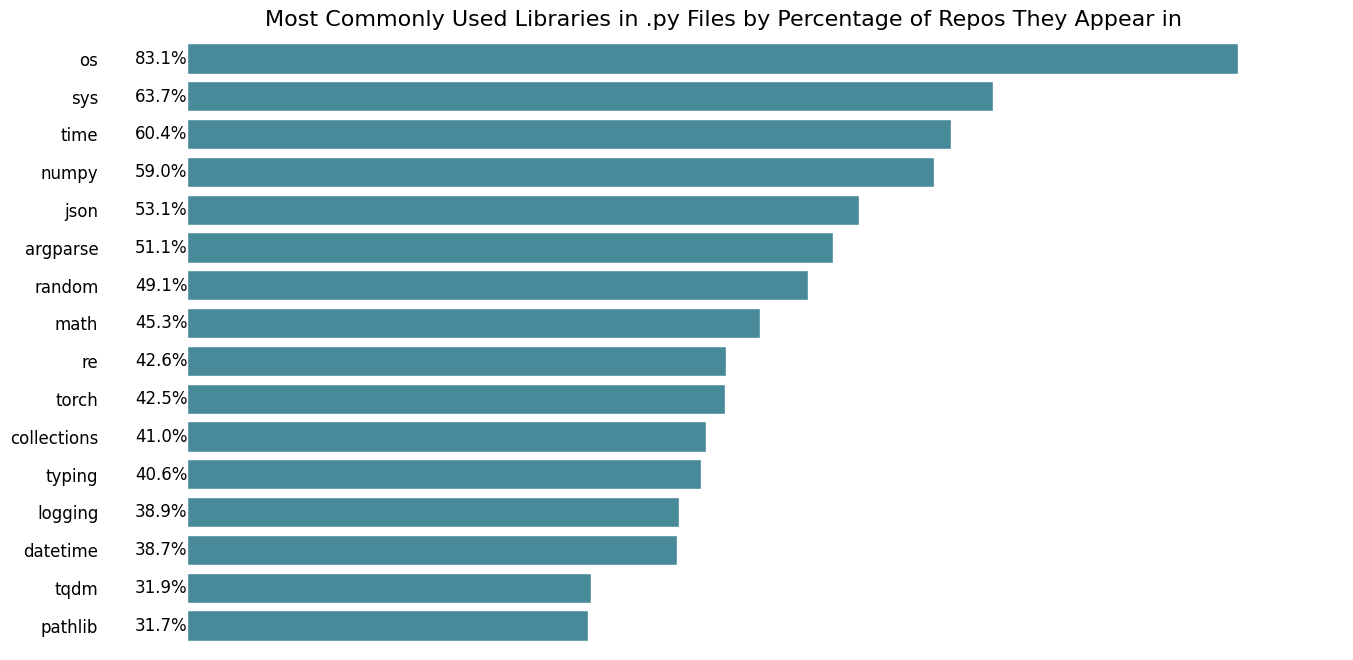

In [9]:
libraries_in_repos_df_py = libraries_in_repos(py_files_imports)
plot_popularity(libraries_in_repos_df_py, 'Most Commonly Used Libraries in .py Files by Percentage of Repos They Appear in', 16, py_repo_count)

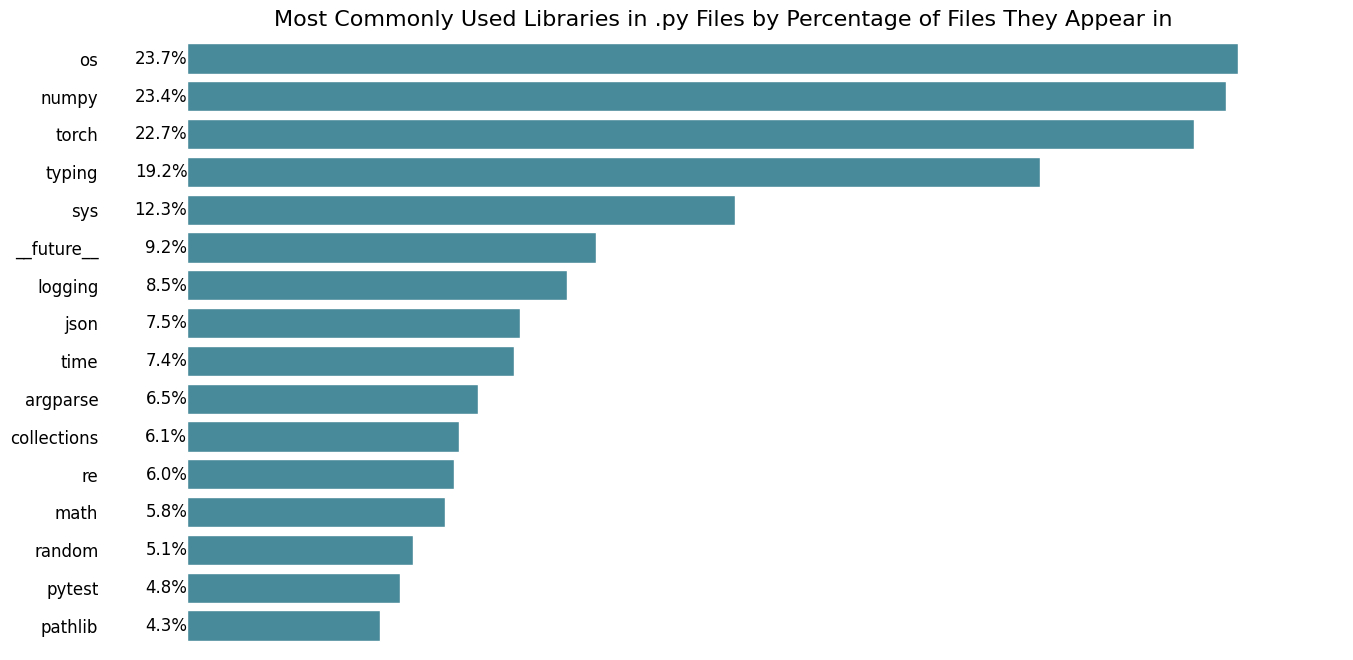

In [10]:
libraries_in_files_df_py = libraries_in_files(py_files_imports)
plot_popularity(libraries_in_files_df_py, 'Most Commonly Used Libraries in .py Files by Percentage of Files They Appear in', 16, py_file_count)

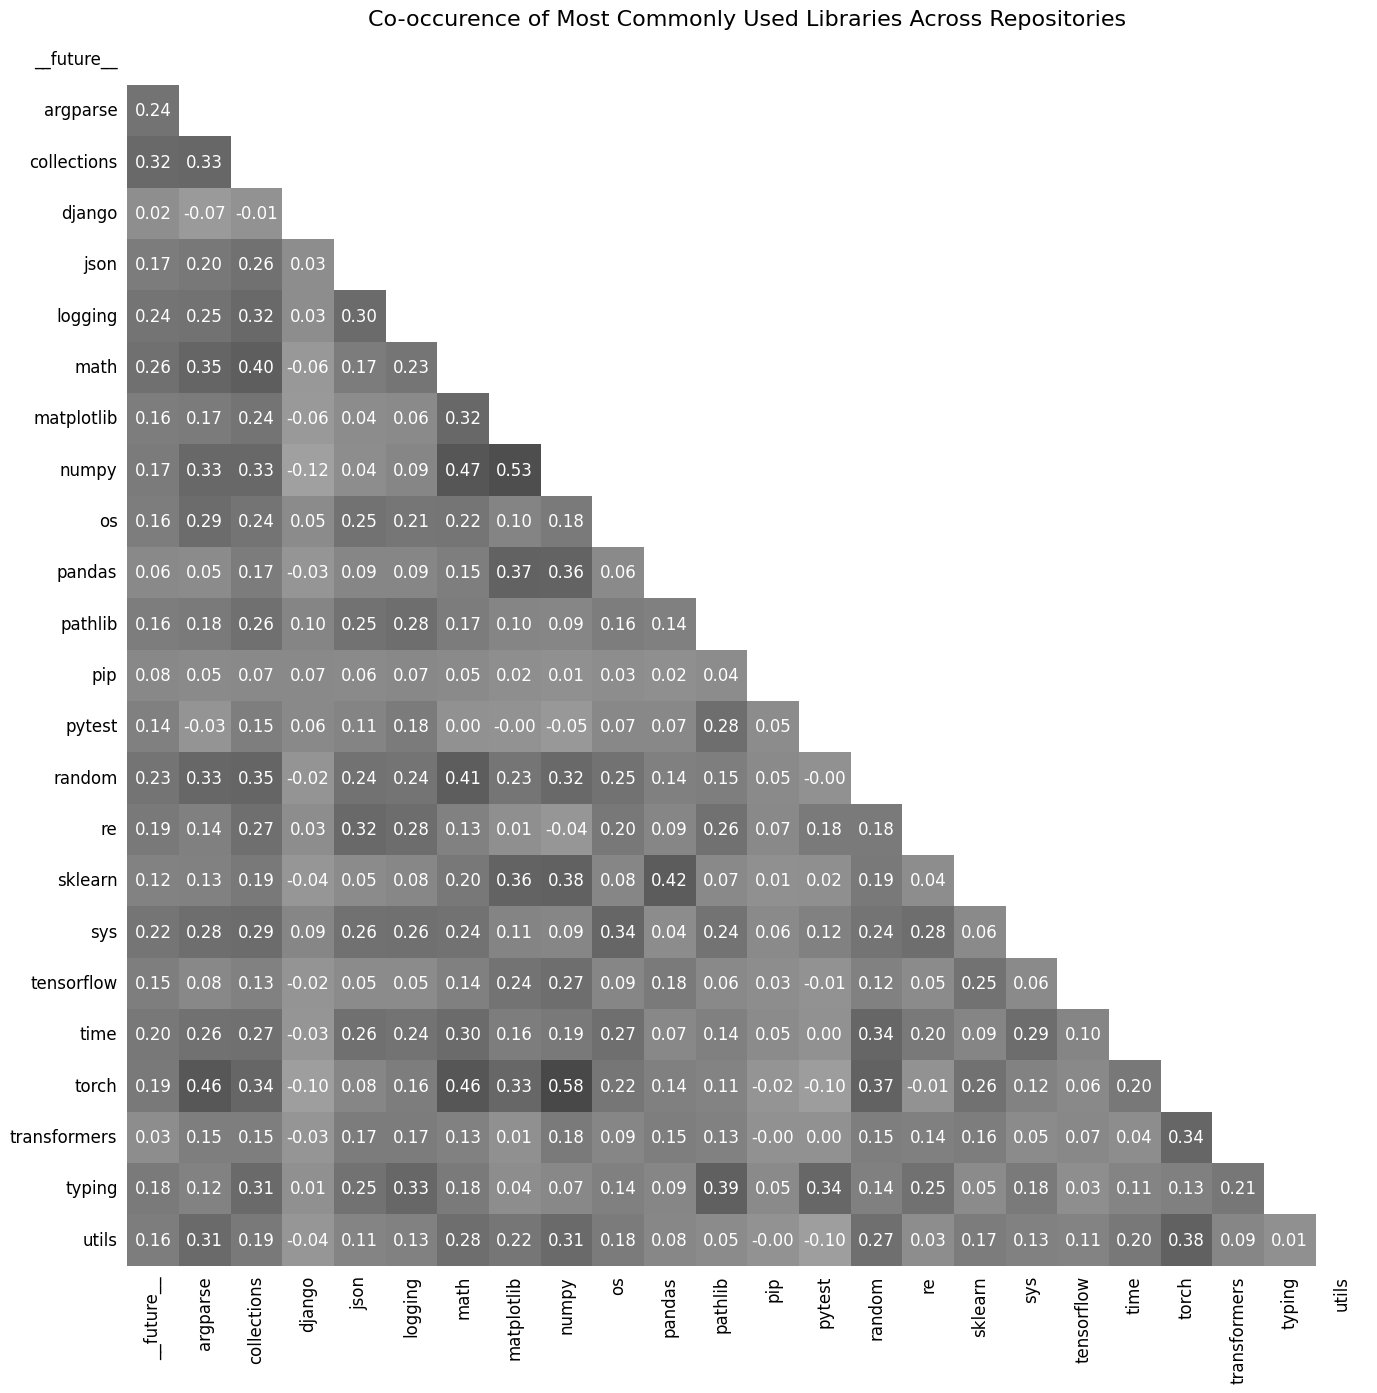

In [11]:
libs_in_repos_corr_all_files = get_corr_table(all_files_imports, index='repo', column='library')
plot_correlation_matrix(libs_in_repos_corr_all_files, "Co-occurence of Most Commonly Used Libraries Across Repositories")

## Data Analysis Libraries

In [12]:
data_analysis_libs = ['pandas', 'numpy', 'scipy', 'statsmodels', 'dask', 'polars', 'sympy', 'patsy', 'modin', 'datatable', 'vaex', 'pyspark', 'koalas', 'cudf', 'pandarallel']

In [13]:
data_analysis_imports_all = all_files_imports[all_files_imports['library'].isin(data_analysis_libs)]
data_analysis_imports_ipynb = ipynb_files_imports[ipynb_files_imports['library'].isin(data_analysis_libs)]
data_analysis_imports_py = py_files_imports[py_files_imports['library'].isin(data_analysis_libs)]

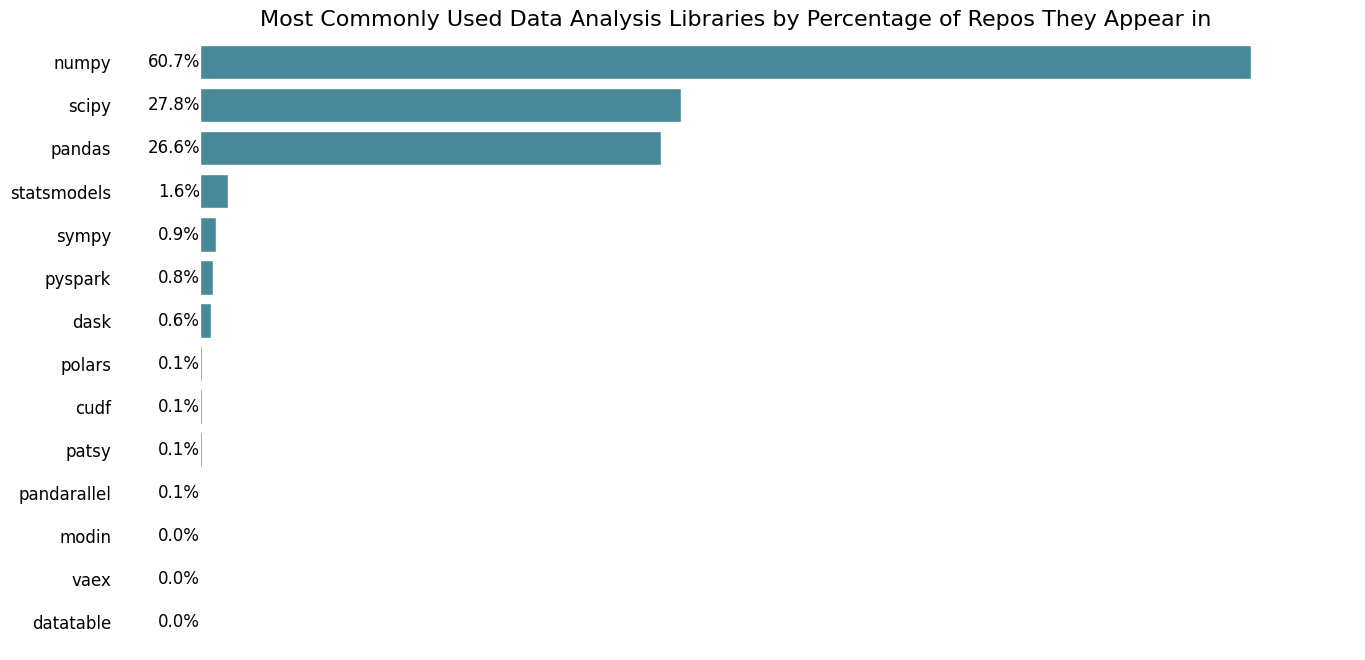

In [14]:
data_analysis_libraries_in_repos_df_all = libraries_in_repos(data_analysis_imports_all)
plot_popularity(data_analysis_libraries_in_repos_df_all, 'Most Commonly Used Data Analysis Libraries by Percentage of Repos They Appear in', 16, all_repo_count)

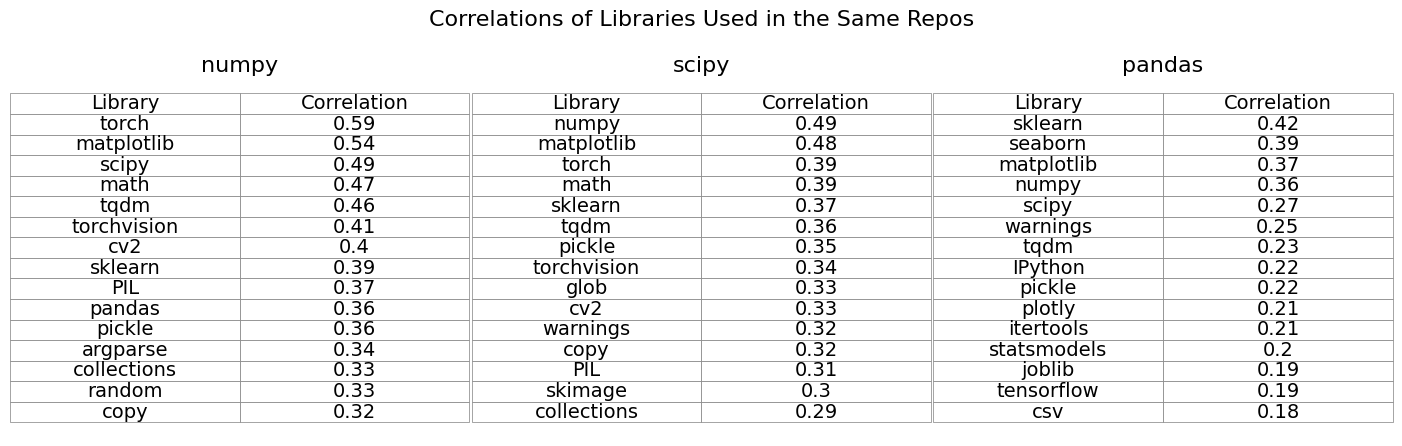

In [83]:
all_numpy_corr_in_repos = repo_lib_corr_table_all['numpy'].sort_values(ascending=False).head(16)
all_scipy_corr_in_repos = repo_lib_corr_table_all['scipy'].sort_values(ascending=False).head(16)
all_pandas_corr_in_repos = repo_lib_corr_table_all['pandas'].sort_values(ascending=False).head(16)
plot_correlations(all_numpy_corr_in_repos, all_scipy_corr_in_repos, all_pandas_corr_in_repos, 'Correlations of Libraries Used in the Same Repos')

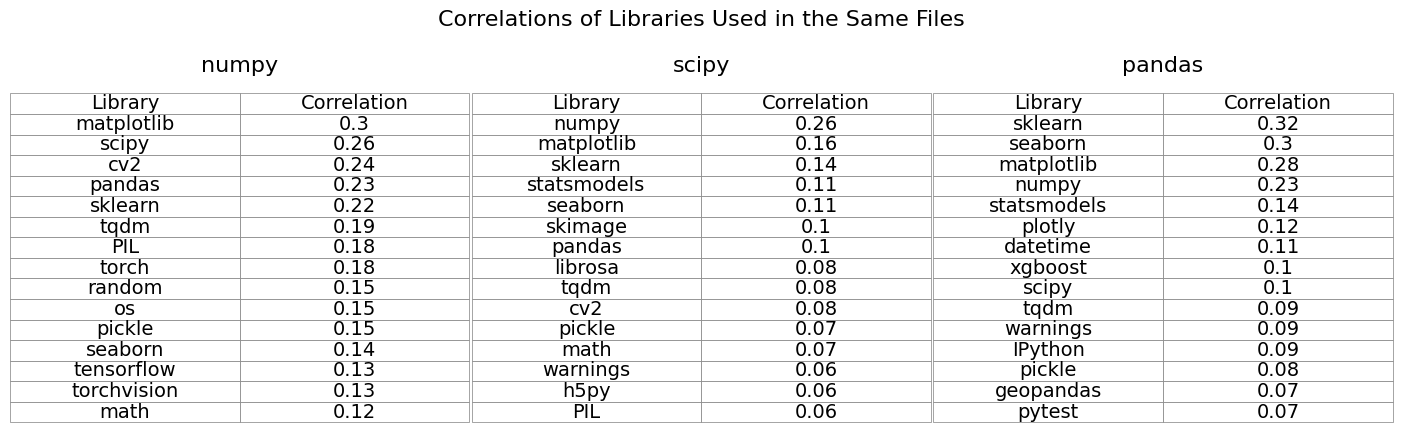

In [86]:
all_numpy_corr_in_files = file_lib_corr_table_all['numpy'].sort_values(ascending=False).head(16)
all_scipy_corr_in_files = file_lib_corr_table_all['scipy'].sort_values(ascending=False).head(16)
all_pandas_corr_in_files = file_lib_corr_table_all['pandas'].sort_values(ascending=False).head(16)
plot_correlations(all_numpy_corr_in_files, all_scipy_corr_in_files, all_pandas_corr_in_files, 'Correlations of Libraries Used in the Same Files')

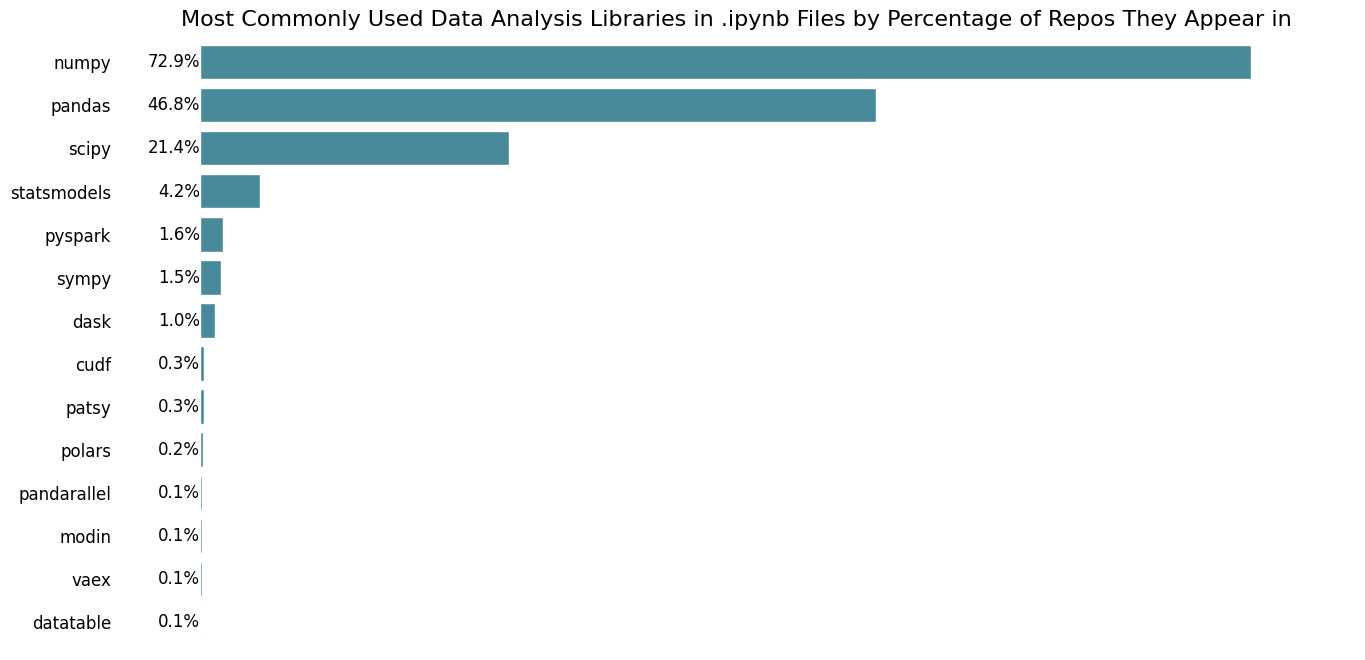

In [15]:
data_analysis_libraries_in_repos_df_ipynb = libraries_in_repos(data_analysis_imports_ipynb)
plot_popularity(data_analysis_libraries_in_repos_df_ipynb, 'Most Commonly Used Data Analysis Libraries in .ipynb Files by Percentage of Repos They Appear in', 16, ipynb_repo_count)

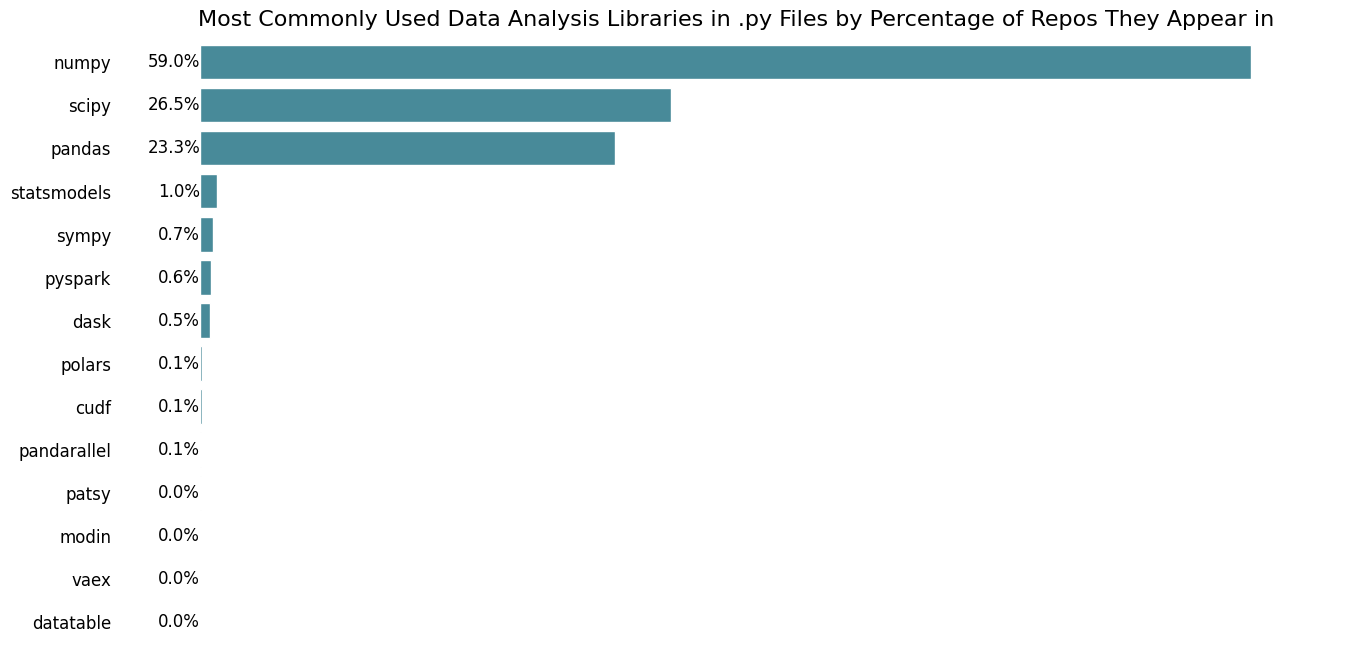

In [16]:
data_analysis_libraries_in_repos_df_py = libraries_in_repos(data_analysis_imports_py)
plot_popularity(data_analysis_libraries_in_repos_df_py, 'Most Commonly Used Data Analysis Libraries in .py Files by Percentage of Repos They Appear in', 16, py_repo_count)

## Visualisation Libraries

In [19]:
visualisation_libs = ['matplotlib', 'seaborn', 'bokeh', 'plotly', 'altair', 'ggplot', 'pygal', 'holoviews', 'geopandas', 'folium', 'dash']

In [20]:
visualisation_imports_all = all_files_imports[all_files_imports['library'].isin(visualisation_libs)]
visualisation_imports_ipynb = ipynb_files_imports[ipynb_files_imports['library'].isin(visualisation_libs)]
visualisation_imports_py = py_files_imports[py_files_imports['library'].isin(visualisation_libs)]

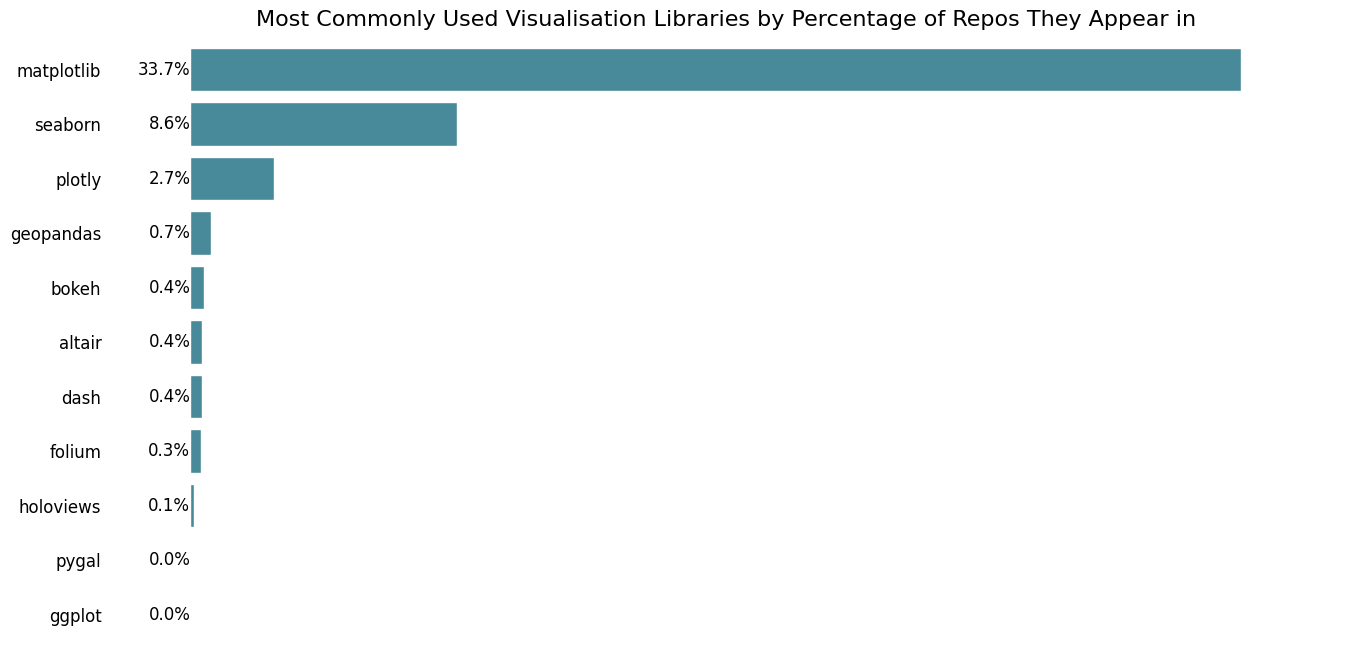

In [21]:
visualisation_libs_in_repos_df_all = libraries_in_repos(visualisation_imports_all)
plot_popularity(visualisation_libs_in_repos_df_all, 'Most Commonly Used Visualisation Libraries by Percentage of Repos They Appear in', 16, all_repo_count)

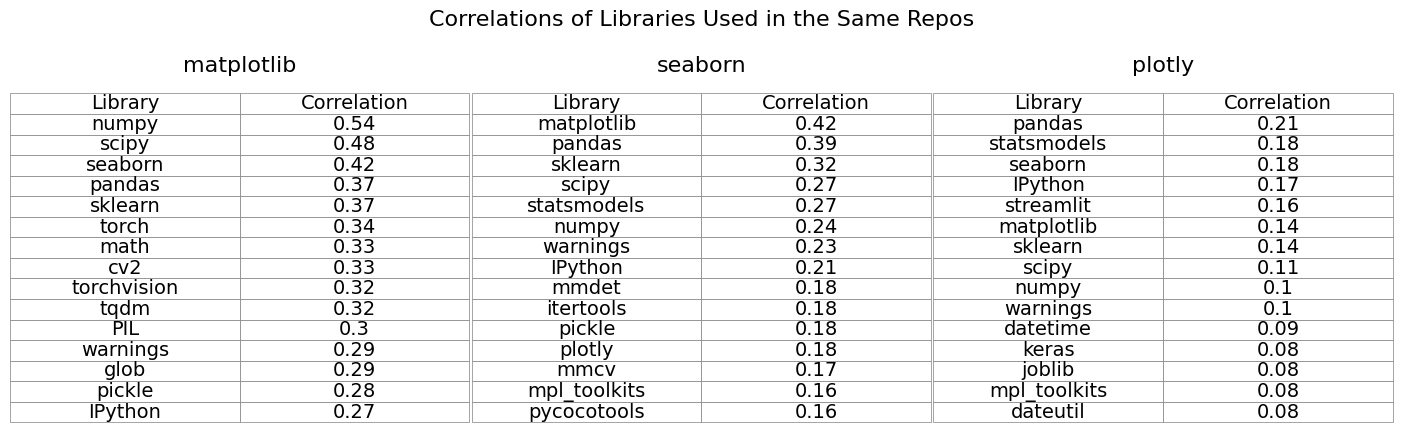

In [89]:
all_matplotlib_corr_in_repos = repo_lib_corr_table_all['matplotlib'].sort_values(ascending=False).head(16)
all_seaborn_corr_in_repos = repo_lib_corr_table_all['seaborn'].sort_values(ascending=False).head(16)
all_plotly_corr_in_repos = repo_lib_corr_table_all['plotly'].sort_values(ascending=False).head(16)
plot_correlations(all_matplotlib_corr_in_repos, all_seaborn_corr_in_repos, all_plotly_corr_in_repos, 'Correlations of Libraries Used in the Same Repos')

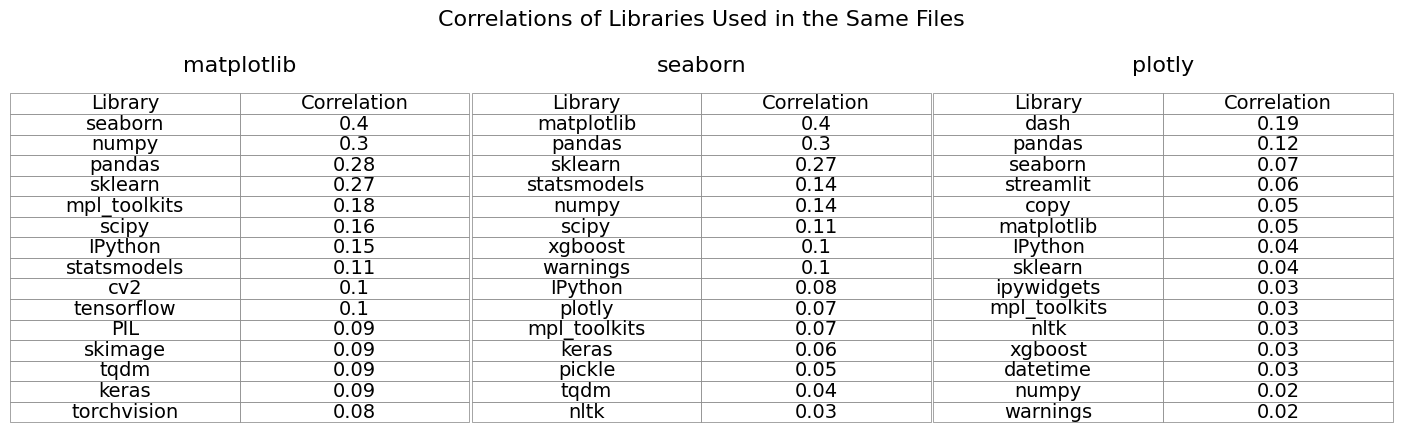

In [91]:
all_matplotlib_corr_in_files = file_lib_corr_table_all['matplotlib'].sort_values(ascending=False).head(16)
all_seaborn_corr_in_files = file_lib_corr_table_all['seaborn'].sort_values(ascending=False).head(16)
all_plotly_corr_in_files = file_lib_corr_table_all['plotly'].sort_values(ascending=False).head(16)
plot_correlations(all_matplotlib_corr_in_files, all_seaborn_corr_in_files, all_plotly_corr_in_files, 'Correlations of Libraries Used in the Same Files')

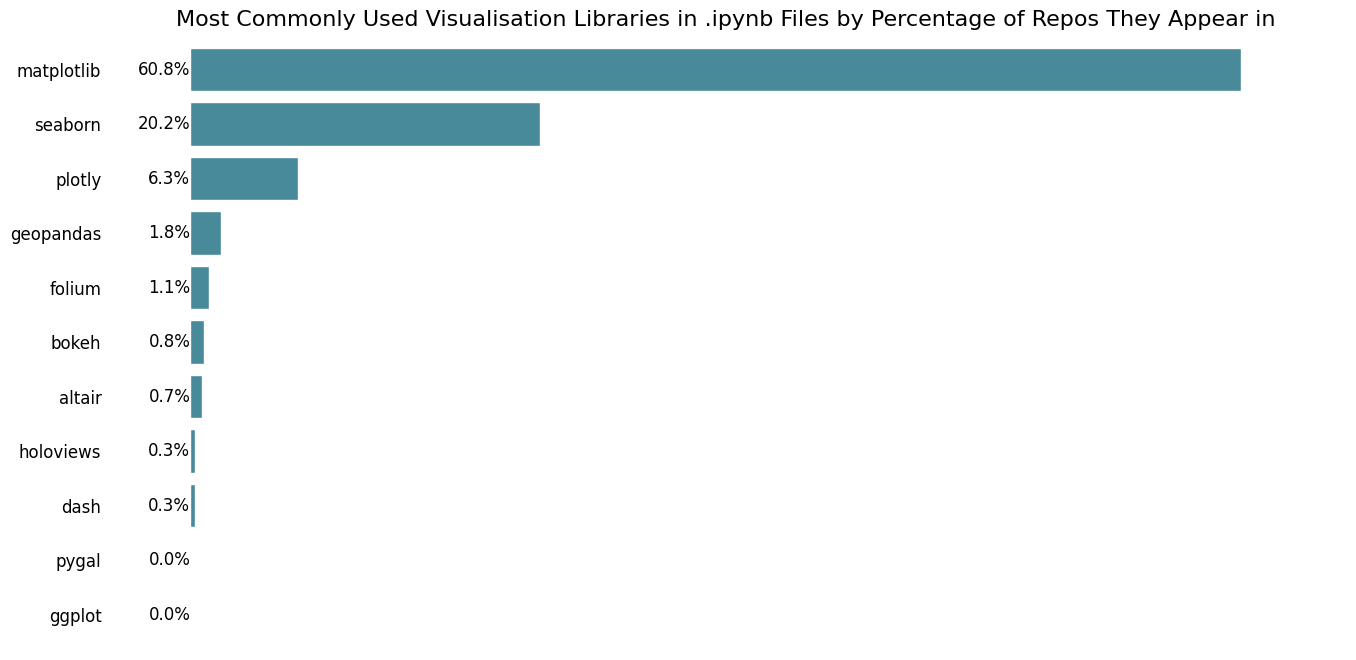

In [22]:
visualisation_libs_in_repos_df_ipynb = libraries_in_repos(visualisation_imports_ipynb)
plot_popularity(visualisation_libs_in_repos_df_ipynb, 'Most Commonly Used Visualisation Libraries in .ipynb Files by Percentage of Repos They Appear in', 16, ipynb_repo_count)

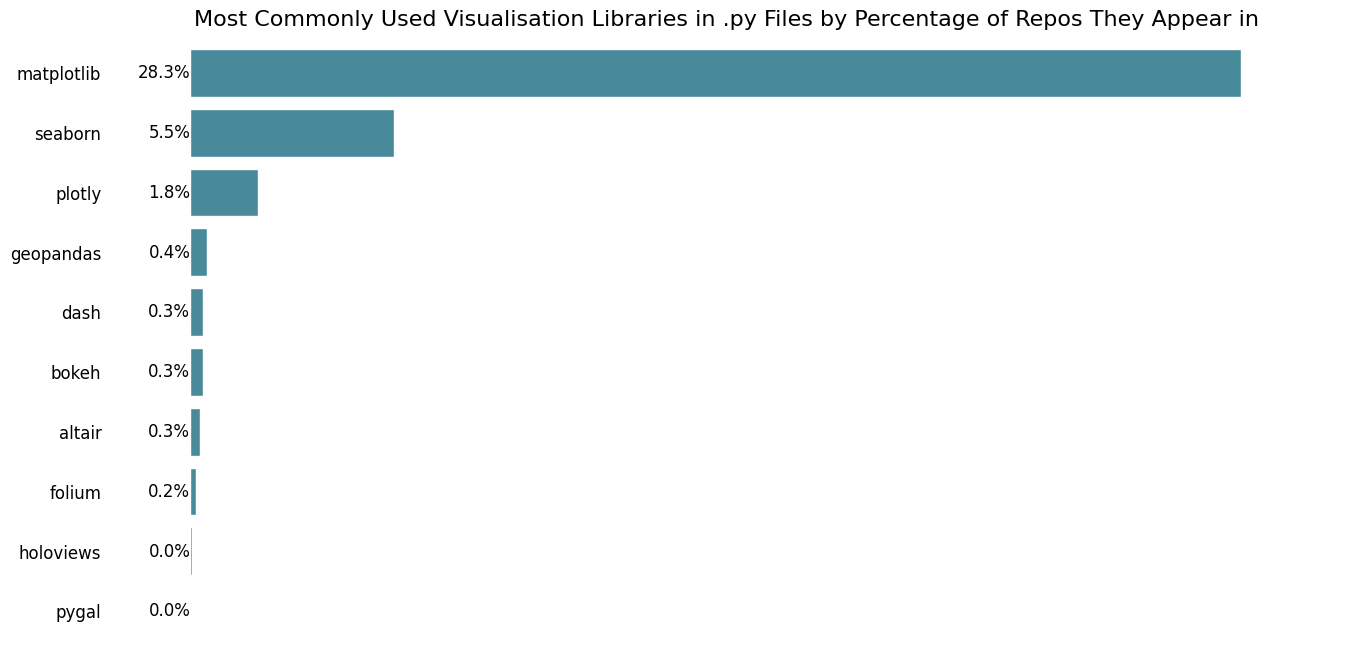

In [23]:
visualisation_libs_in_repos_df_py = libraries_in_repos(visualisation_imports_py)
plot_popularity(visualisation_libs_in_repos_df_py, 'Most Commonly Used Visualisation Libraries in .py Files by Percentage of Repos They Appear in', 16, py_repo_count)

## ML Libraries

In [25]:
ml_libs = ['sklearn', 'tensorflow', 'keras', 'xgboost', 'lightgbm', 'catboost', 'theano', 'caffe', 'torch']

In [26]:
ml_imports_all = all_files_imports[all_files_imports['library'].isin(ml_libs)]
ml_imports_ipynb = ipynb_files_imports[ipynb_files_imports['library'].isin(ml_libs)]
ml_imports_py = py_files_imports[py_files_imports['library'].isin(ml_libs)]

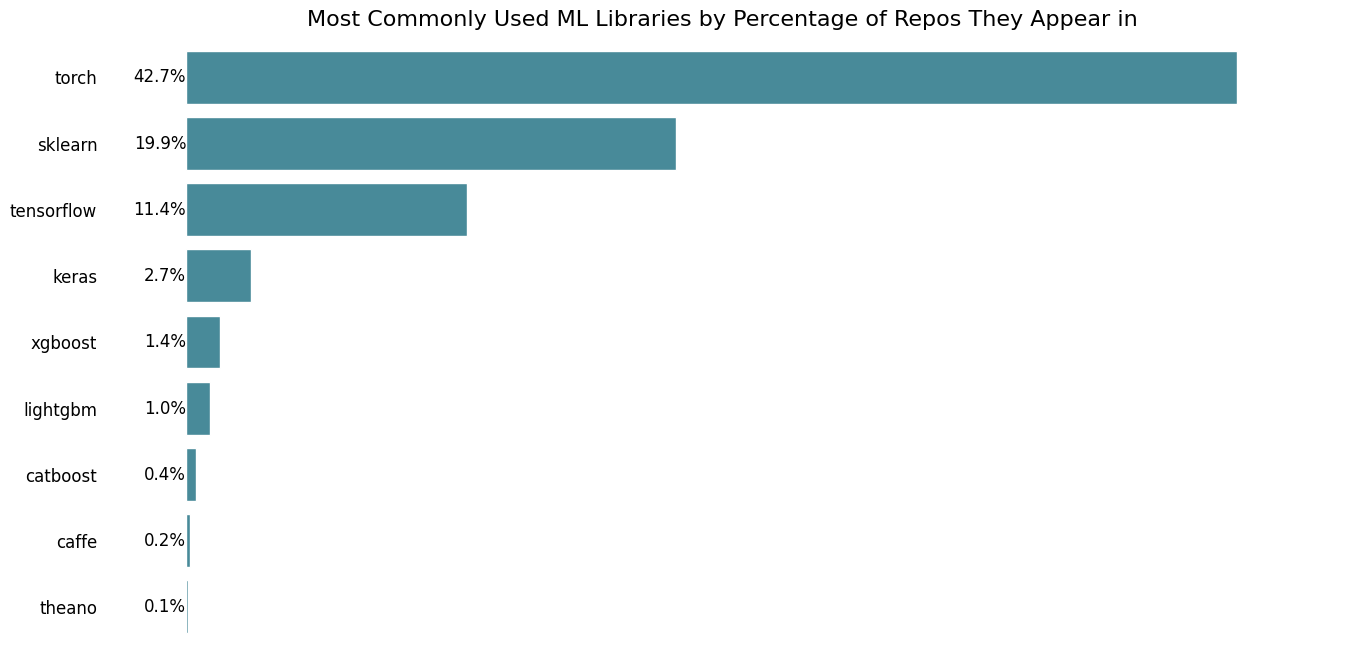

In [27]:
ml_libs_in_repos_df_all = libraries_in_repos(ml_imports_all)
plot_popularity(ml_libs_in_repos_df_all, 'Most Commonly Used ML Libraries by Percentage of Repos They Appear in', 16, all_repo_count)

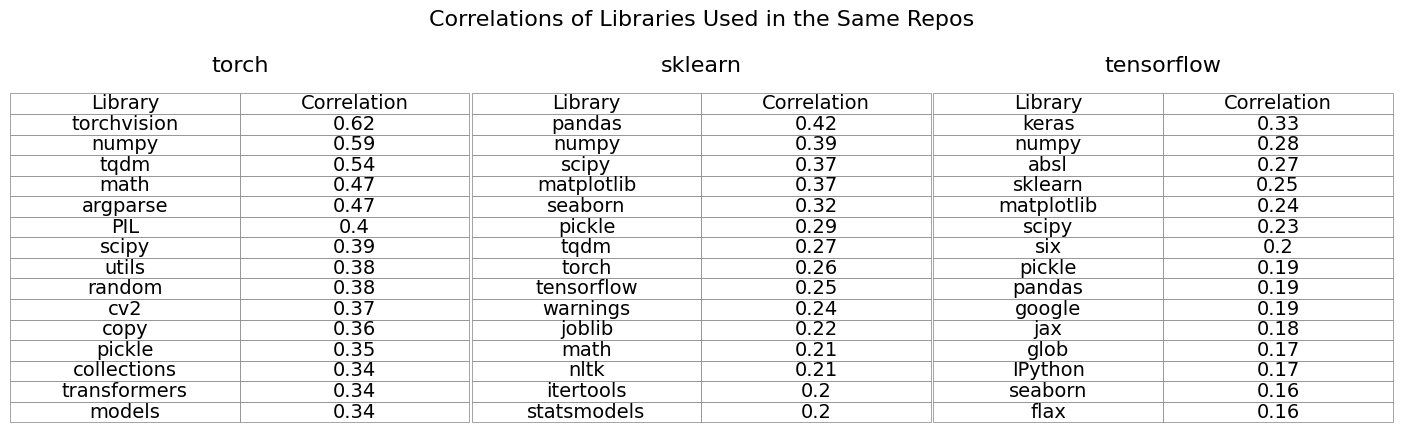

In [92]:
all_torch_corr_in_repos = repo_lib_corr_table_all['torch'].sort_values(ascending=False).head(16)
all_sklearn_corr_in_repos = repo_lib_corr_table_all['sklearn'].sort_values(ascending=False).head(16)
all_tensorflow_corr_in_repos = repo_lib_corr_table_all['tensorflow'].sort_values(ascending=False).head(16)
plot_correlations(all_torch_corr_in_repos, all_sklearn_corr_in_repos, all_tensorflow_corr_in_repos, 'Correlations of Libraries Used in the Same Repos')

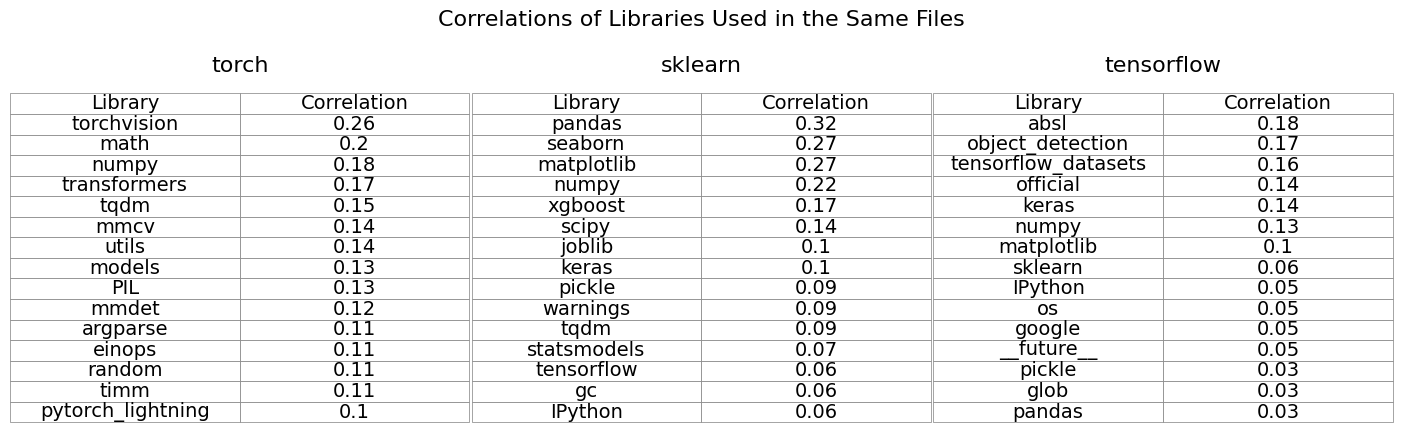

In [93]:
all_torch_corr_in_files = file_lib_corr_table_all['torch'].sort_values(ascending=False).head(16)
all_sklearn_corr_in_files = file_lib_corr_table_all['sklearn'].sort_values(ascending=False).head(16)
all_tensorflow_corr_in_files = file_lib_corr_table_all['tensorflow'].sort_values(ascending=False).head(16)
plot_correlations(all_torch_corr_in_files, all_sklearn_corr_in_files, all_tensorflow_corr_in_files, 'Correlations of Libraries Used in the Same Files')

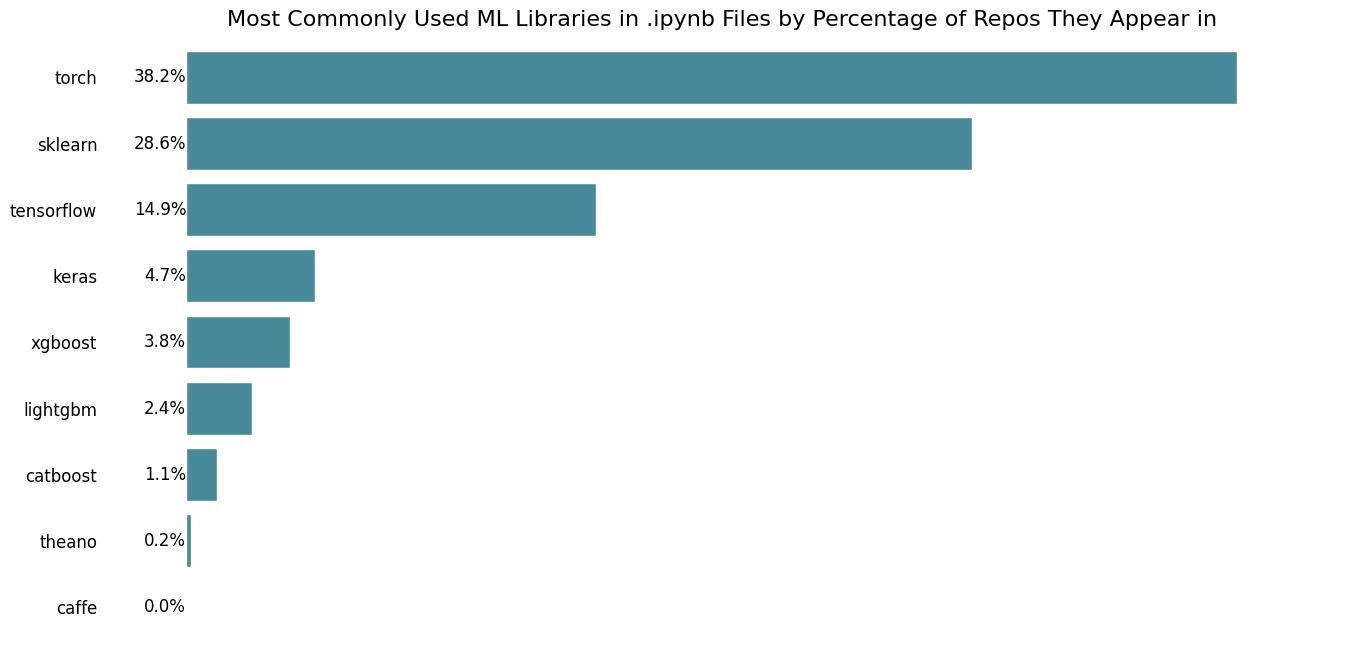

In [28]:
ml_libs_in_repos_df_ipynb = libraries_in_repos(ml_imports_ipynb)
plot_popularity(ml_libs_in_repos_df_ipynb, 'Most Commonly Used ML Libraries in .ipynb Files by Percentage of Repos They Appear in', 16, ipynb_repo_count)

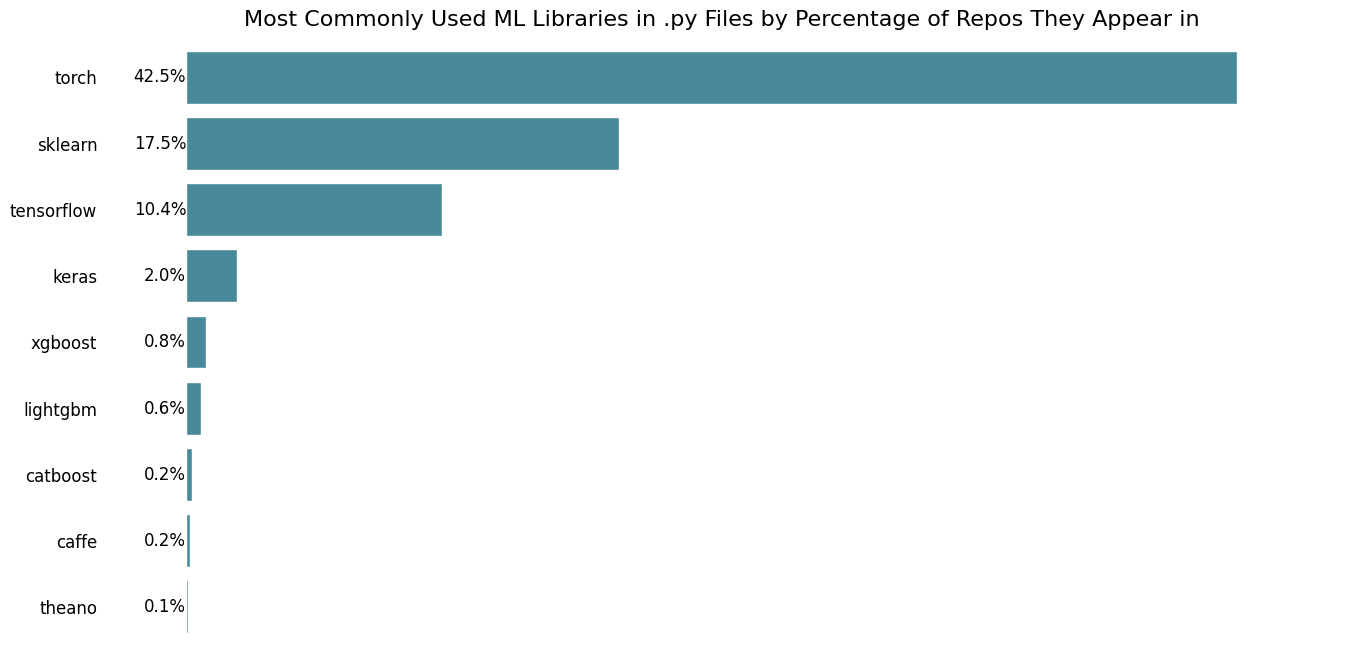

In [29]:
ml_libs_in_repos_df_py = libraries_in_repos(ml_imports_py)
plot_popularity(ml_libs_in_repos_df_py, 'Most Commonly Used ML Libraries in .py Files by Percentage of Repos They Appear in', 16, py_repo_count)

## NLP Libraries

In [99]:
nlp_libs = ['nltk', 'spacy', 'gensim', 'textblob', 'stanfordnlp', 'pattern', 'flair', 'transformers', 'allennlp', 'parlai', 'fairseq']

In [100]:
nlp_imports_all = all_files_imports[all_files_imports['library'].isin(nlp_libs)]
nlp_imports_ipynb = ipynb_files_imports[ipynb_files_imports['library'].isin(nlp_libs)]
nlp_imports_py = py_files_imports[py_files_imports['library'].isin(nlp_libs)]

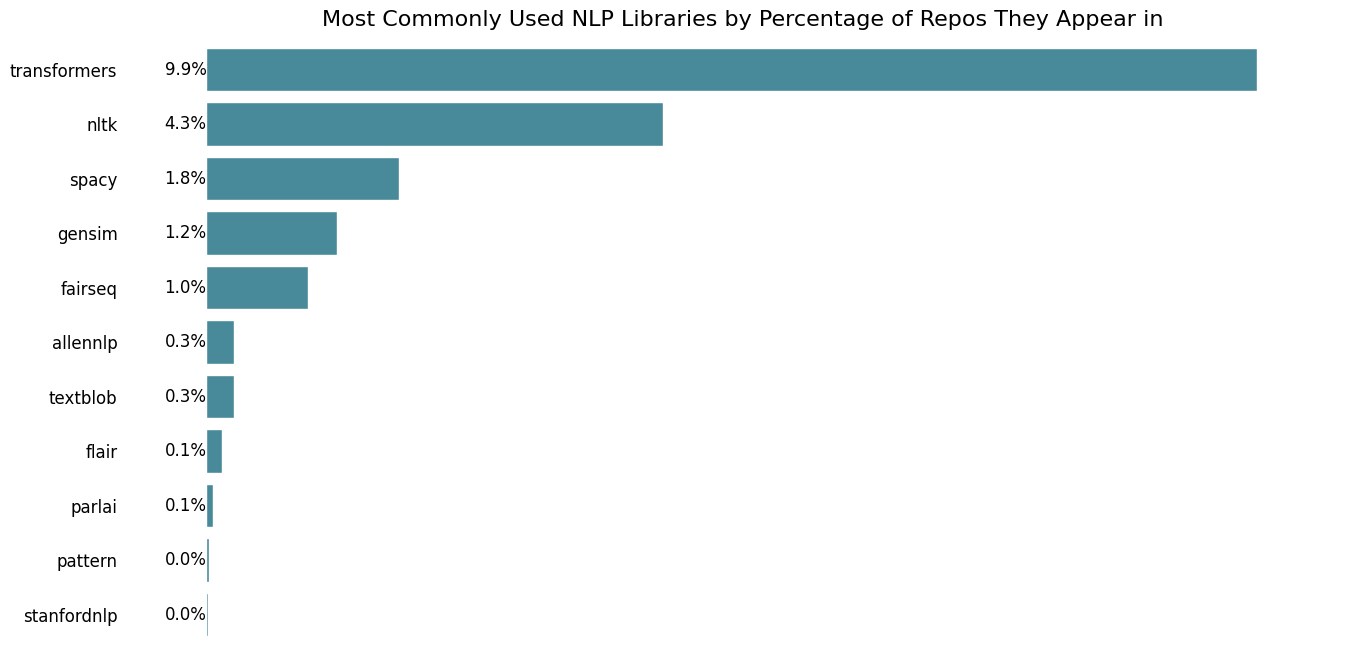

In [101]:
nlp_libs_in_repos_df_all = libraries_in_repos(nlp_imports_all)
plot_popularity(nlp_libs_in_repos_df_all, 'Most Commonly Used NLP Libraries by Percentage of Repos They Appear in', 16, all_repo_count)

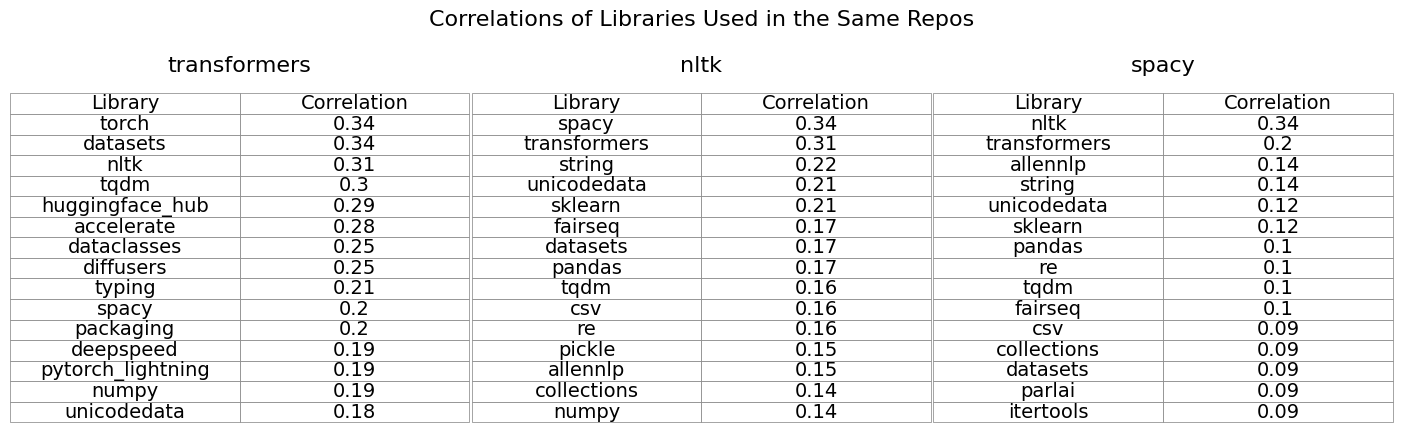

In [102]:
all_transformers_corr_in_repos = repo_lib_corr_table_all['transformers'].sort_values(ascending=False).head(16)
all_nltk_corr_in_repos = repo_lib_corr_table_all['nltk'].sort_values(ascending=False).head(16)
all_spacy_corr_in_repos = repo_lib_corr_table_all['spacy'].sort_values(ascending=False).head(16)
plot_correlations(all_transformers_corr_in_repos, all_nltk_corr_in_repos, all_spacy_corr_in_repos, 'Correlations of Libraries Used in the Same Repos')

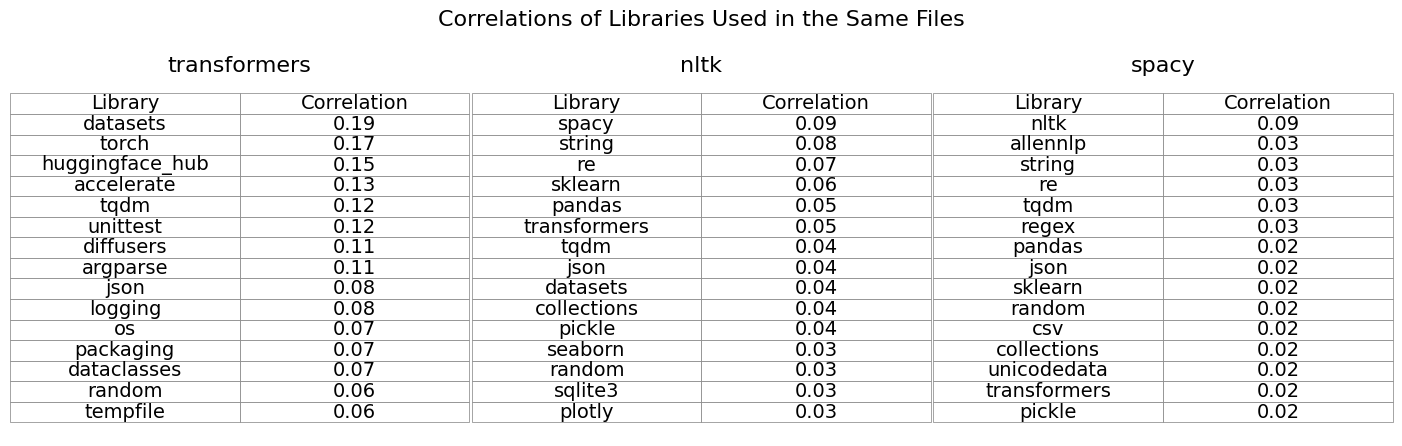

In [95]:
all_transformers_corr_in_files = file_lib_corr_table_all['transformers'].sort_values(ascending=False).head(16)
all_nltk_corr_in_files = file_lib_corr_table_all['nltk'].sort_values(ascending=False).head(16)
all_spacy_corr_in_files = file_lib_corr_table_all['spacy'].sort_values(ascending=False).head(16)
plot_correlations(all_transformers_corr_in_files, all_nltk_corr_in_files, all_spacy_corr_in_files, 'Correlations of Libraries Used in the Same Files')

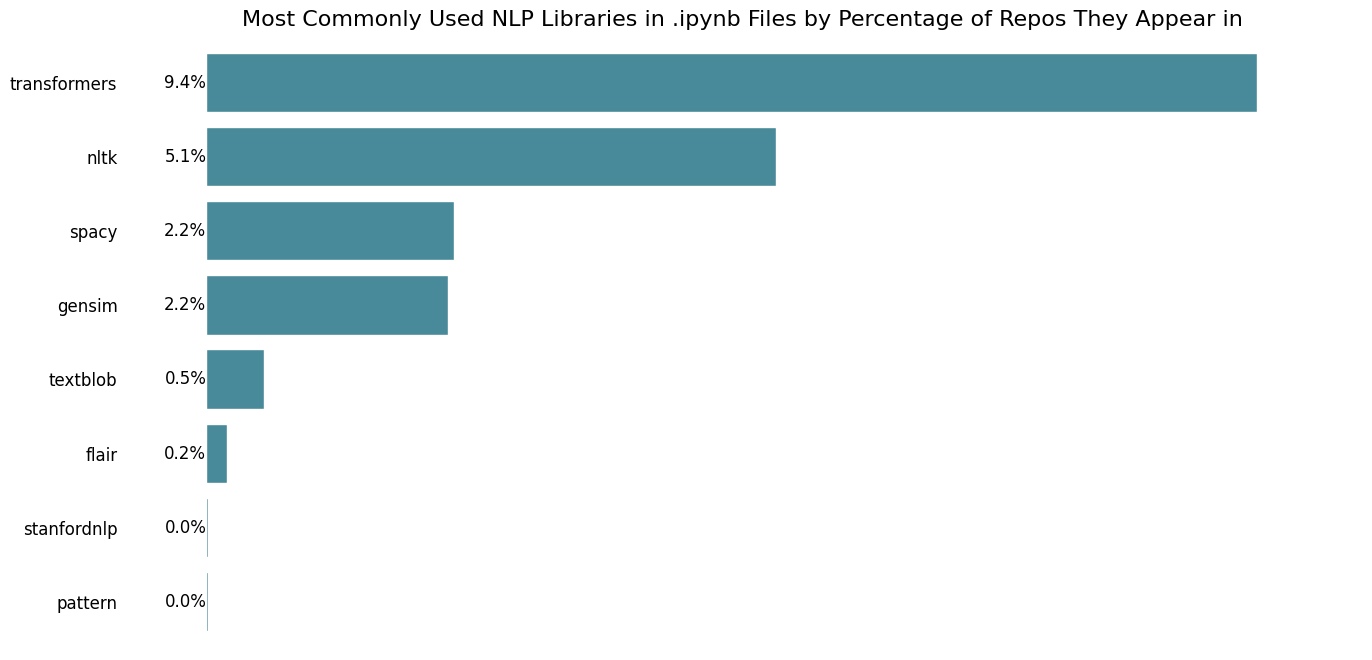

In [33]:
nlp_libs_in_repos_df_ipynb = libraries_in_repos(nlp_imports_ipynb)
plot_popularity(nlp_libs_in_repos_df_ipynb, 'Most Commonly Used NLP Libraries in .ipynb Files by Percentage of Repos They Appear in', 16, ipynb_repo_count)

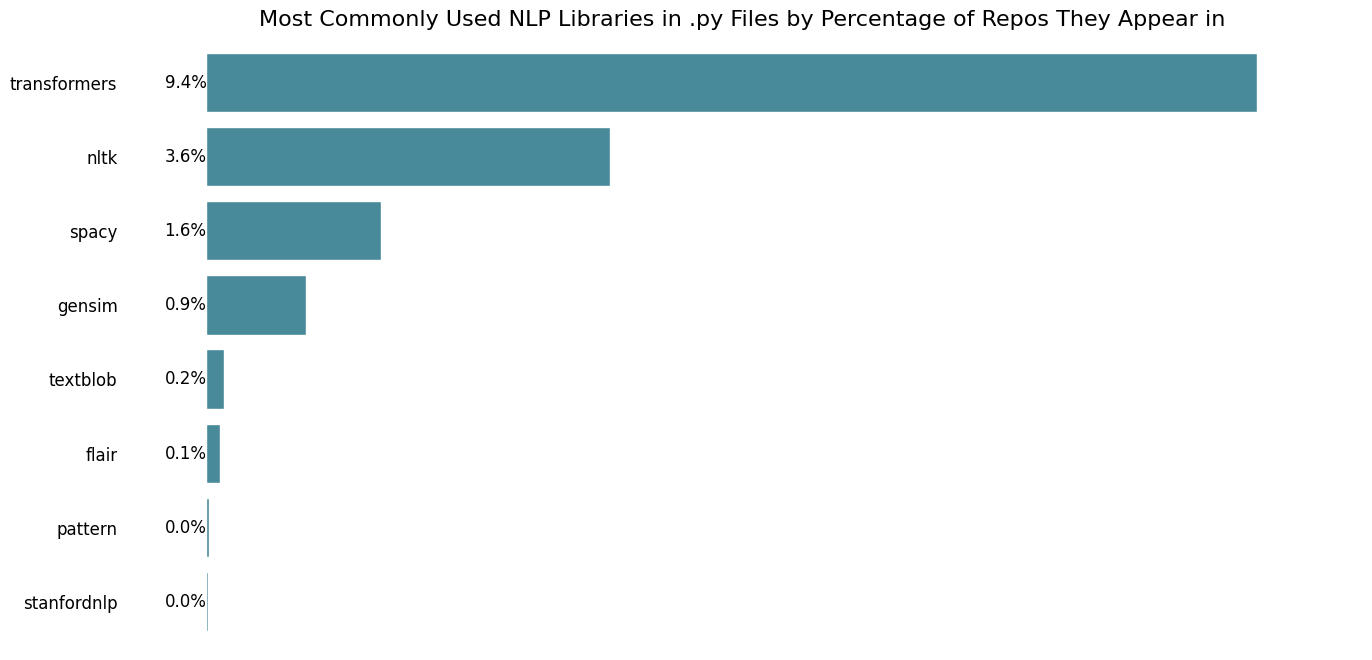

In [34]:
nlp_libs_in_repos_df_py = libraries_in_repos(nlp_imports_py)
plot_popularity(nlp_libs_in_repos_df_py, 'Most Commonly Used NLP Libraries in .py Files by Percentage of Repos They Appear in', 16, py_repo_count)

## Backend Libraries

In [105]:
backend_libs = ['django', 'flask', 'fastapi', 'pyramid', 'tornado', 'sanic', 'falcon', 'bottle', 'cherrypy', 'web2py', 'starlette']

In [106]:
backend_imports_all = all_files_imports[all_files_imports['library'].isin(backend_libs)]
backend_imports_ipynb = ipynb_files_imports[ipynb_files_imports['library'].isin(backend_libs)]
backend_imports_py = py_files_imports[py_files_imports['library'].isin(backend_libs)]

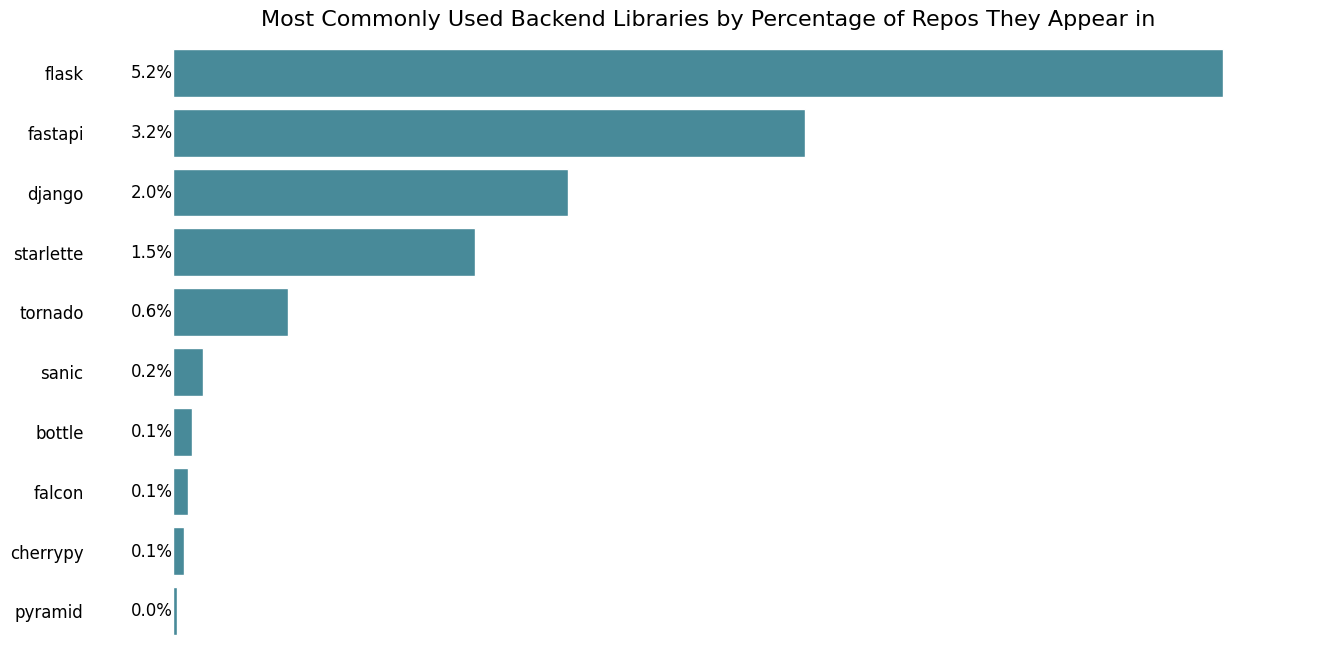

In [107]:
backend_libs_in_repos_df_all = libraries_in_repos(backend_imports_all)
plot_popularity(backend_libs_in_repos_df_all, 'Most Commonly Used Backend Libraries by Percentage of Repos They Appear in', 16, all_repo_count)

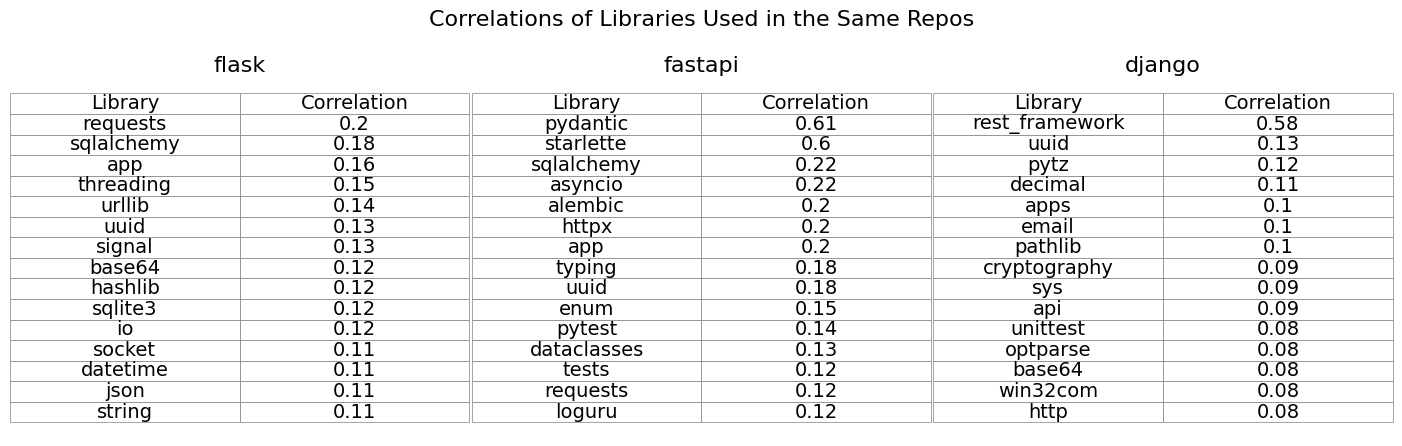

In [103]:
all_flask_corr_in_repos = repo_lib_corr_table_all['flask'].sort_values(ascending=False).head(16)
all_fastapi_corr_in_repos = repo_lib_corr_table_all['fastapi'].sort_values(ascending=False).head(16)
all_django_corr_in_repos = repo_lib_corr_table_all['django'].sort_values(ascending=False).head(16)
plot_correlations(all_flask_corr_in_repos, all_fastapi_corr_in_repos, all_django_corr_in_repos, 'Correlations of Libraries Used in the Same Repos')

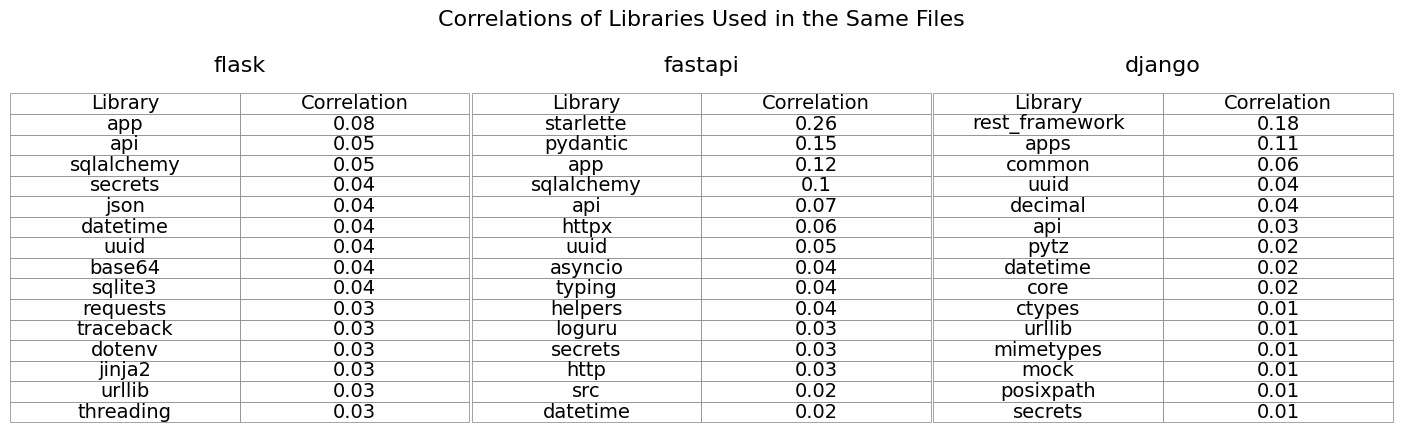

In [104]:
all_flask_corr_in_files = file_lib_corr_table_all['flask'].sort_values(ascending=False).head(16)
all_fastapi_corr_in_files = file_lib_corr_table_all['fastapi'].sort_values(ascending=False).head(16)
all_django_corr_in_files = file_lib_corr_table_all['django'].sort_values(ascending=False).head(16)
plot_correlations(all_flask_corr_in_files, all_fastapi_corr_in_files, all_django_corr_in_files, 'Correlations of Libraries Used in the Same Files')

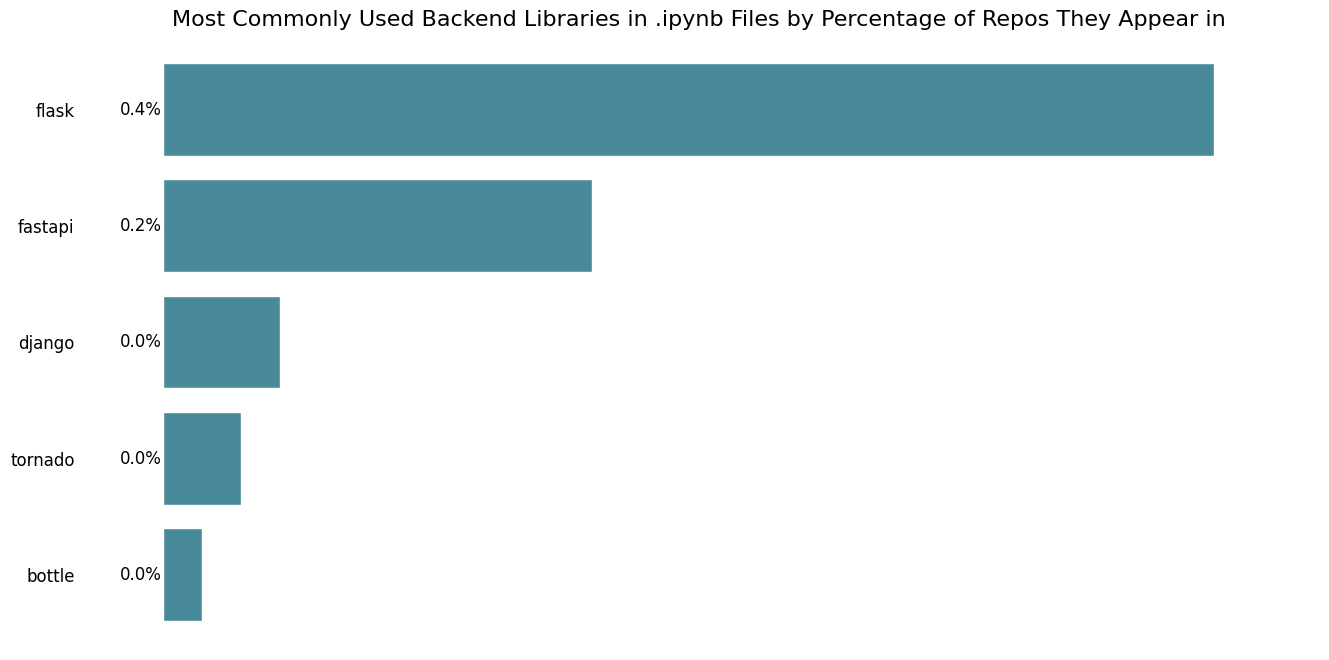

In [38]:
backend_libs_in_repos_df_ipynb = libraries_in_repos(backend_imports_ipynb)
plot_popularity(backend_libs_in_repos_df_ipynb, 'Most Commonly Used Backend Libraries in .ipynb Files by Percentage of Repos They Appear in', 16, ipynb_repo_count)

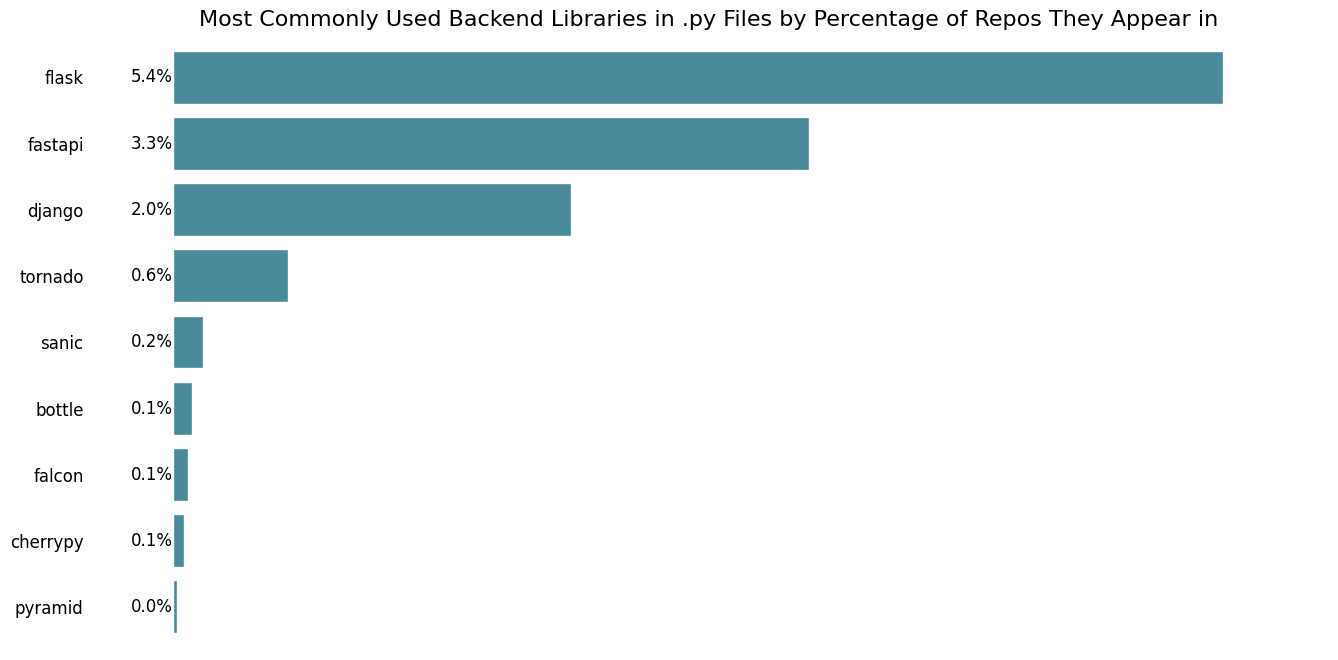

In [39]:
backend_libs_in_repos_df_py = libraries_in_repos(backend_imports_py)
plot_popularity(backend_libs_in_repos_df_py, 'Most Commonly Used Backend Libraries in .py Files by Percentage of Repos They Appear in', 16, py_repo_count)

## ORM Modules

In [123]:
orm_modules = ['sqlalchemy.orm', 'django.db', 'peewee', 'pony.orm', 'sqlobject', 'gino', 'tortoise']
orm_libs = ['peewee', 'sqlobject', 'gino', 'tortoise']

In [124]:
orm_imports_all = all_files_imports[(all_files_imports['module'].isin(orm_modules)) | (all_files_imports['library'].isin(orm_libs))]
orm_imports_ipynb = ipynb_files_imports[(ipynb_files_imports['module'].isin(orm_modules)) | (ipynb_files_imports['library'].isin(orm_libs))]
orm_imports_py = py_files_imports[(py_files_imports['module'].isin(orm_modules)) | (py_files_imports['library'].isin(orm_libs))]

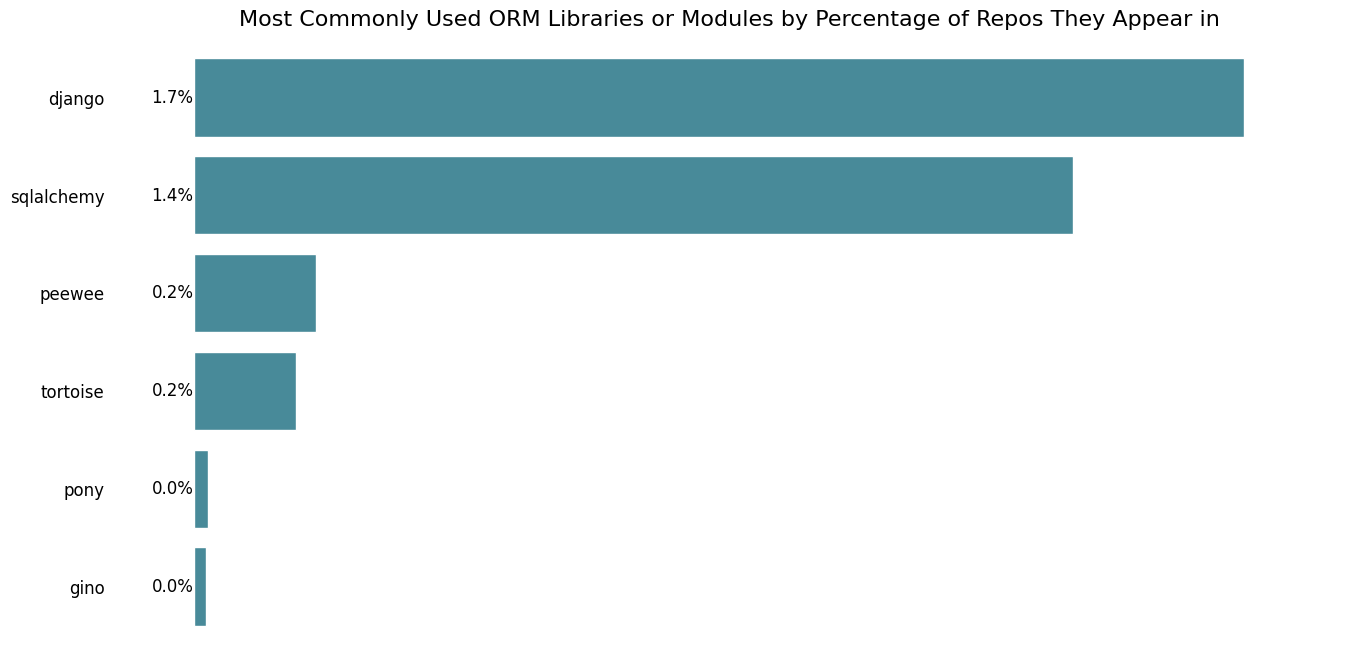

In [126]:
orm_libs_in_repos_df_all = libraries_in_repos(orm_imports_all)
plot_popularity(orm_libs_in_repos_df_all, 'Most Commonly Used ORM Libraries or Modules by Percentage of Repos They Appear in', 16, all_repo_count)